# Genetic Algorithm and Its Applications

In [5]:
%cd /content/drive/MyDrive/Colab Notebooks/MODULE04

/content/drive/MyDrive/Colab Notebooks/MODULE04


# Bài tập 1. Kỹ thuật đọc và xử lý dữ liệu từ file .csv
Hãy hoàn thành function load_data_from_file() trả về dữ liệu đã được tổ chức (features_X cho input và sales_Y cho output).

In [6]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "data/ga_advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  intercept = np.ones((features_X.shape[0], 1))
  features_X = np.concatenate((intercept, features_X), axis=1)

  return features_X, sales_Y


In [7]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [8]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


# Bài tập 2. Kỹ thuật khởi tạo giá trị cho từng gene trong chromosome (individual), tạo ra các giá trị ngẫu nhiên cho một cá thể (tham số theta của mô hình)
Hãy hoàn thiện function create_individual(n,bound) để khởi tạo ngẫu nhiên giá trị của n genes (tham số θi) trong chromosome với giá trị từng gene được khởi tạo [-bound/2, bound/2]

In [9]:
def generate_random_value(bound = 10):
  return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):
  # **************** your code here ****************
  individual = np.array([generate_random_value(bound) for i in range(n)])
  return individual

In [10]:
individual = create_individual()
print(individual)

[ 3.44421852  2.57954403 -0.79428419 -2.4108325 ]


# Bài tập 3. Kỹ thuật xây dựng fitness function để đánh giá fitness score cho từng chromosome
Hãy hoàn thiện function compute_fitness(individual) để tính fitness values của một chromosome bằng cách nghịch đảo giá trị của hàm loss theo công thức fitness = 1 / (loss + 1). Hàm compute_fitness(individual) đánh giá độ tốt của một cá thể. Giá trị càng lớn thì cá thể càng tốt

In [11]:
def compute_loss(individual):
  theta = np.array(individual)
  y_hat = features_X.dot(theta)
  loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
  return loss

def compute_fitness(individual):
  # **************** your code here ****************
  loss = compute_loss(individual)
  fitness = 1 / (loss + 1)
  return fitness

In [12]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0185991537088997e-06


# Bài tập 4. Kỹ thuật thực hiện crossover giữa 2 chromosomes
Hãy hoàn thiện function crossover(individual1, individual2, crossover_rate = 0.9) để thực hiện crossover giữa 2 individual (chromosome). Bước này, thực hiện việc lai tạo (trao đổi gen) giữa 2 individual với tỉ lệ crossover_rate

In [13]:
def crossover(individual1, individual2, crossover_rate = 0.9):
  individual1_new = individual1.copy()
  individual2_new = individual2.copy()

  # **************** your code here ****************
  for i in range(len(individual1)):
    if random.random() < crossover_rate:
      individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i]

  return individual1_new, individual2_new

In [14]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


# Bài tập 5. Kỹ thuật mutation với chromosome
Hãy hoàn thiện function mutate(individual, mutation_rate = 0.05) để thực hiện việc đột biến cho một cá thể với tỉ lệ đột biến là mutation_rate.

In [15]:
def mutate(individual, mutation_rate = 0.05):
  individual_m = individual.copy()

  # **************** your code here ****************
  for i in range(len(individual)):
    if random.random() < mutation_rate:
      individual_m[i] = generate_random_value()

  return individual_m

In [16]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


# Bài tập 6. Khởi tạo population đầu tiên
Hãy hoàn thiện function initializePopulation(m) để thực
hiện việc khởi tạo m cá thể (individual, chromosome) cho population.

In [17]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [18]:
population = initializePopulation(100)
print(len(population))

100


In [21]:
population[:5]

[array([4.09746256, 4.82785476, 3.10217236, 4.0216595 ]),
 array([-1.89852431,  2.29831748,  3.98838288,  1.83983932]),
 array([-0.27857285, -3.99298792, -0.65828165,  1.10886973]),
 array([ 4.13011053,  4.66606368, -0.22990223,  3.65309928]),
 array([-2.3950769 ,  3.05027827,  0.48699304, -4.859583  ])]

# Bài tập 7. Kỹ thuật selection để thực hiện việc chọc lọc tư nhiên, đào thải những cá thể yếu trong population
Hãy hoàn thiện function selection() để thực hiện việc chọn lọc tự nhiên cá thể tốt vào thế hệ kế tiếp.

In [22]:
def selection(sorted_old_population, m):
  index1 = random.randint(0, m-1)
  while True:
    index2 = random.randint(0, m-1)
    if (index2 != index1):
      break

  individual_s = sorted_old_population[index1]
  if index2 > index1:
    individual_s = sorted_old_population[index2]

  return individual_s

In [24]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[ 2.44036285 -0.50345928  0.08899025  3.06823938]


# Bài tập 8. Kỹ thuật tạo ra quần thể (population) mới
Hãy hoàn thiện function create_new_population() để tạo ra quần thể mới đựa trên các bước selection, crossover và mutation. Lưu ý rằng chúng ta sẽ sử dụng giải thuât Elitist algorithms để đảm bảo rằng elitism cá thể tốt nhất không bị loại bỏ, bằng cách
chuyển chúng trực tiếp sang thế hệ tiếp theo.

In [26]:
def create_new_population(old_population, elitism=2, gen=1):
  m = len(old_population)
  sorted_population = sorted(old_population, key=compute_fitness)

  if gen%1 == 0:
    print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

  new_population = []
  while len(new_population) < m-elitism:
    # selection
    # **************** your code here ****************
    individual_s1 = selection(sorted_population, m)
    individual_s2 = selection(sorted_population, m)

    # crossover
    # **************** your code here ****************
    individual_c1, individual_c2 = crossover(individual_s1, individual_s2)

    # mutation
    # **************** your code here ****************
    individual_m1 = mutate(individual_c1)
    individual_m2 = mutate(individual_c2)

    new_population.append(individual_m1)
    new_population.append(individual_m2)

    # copy elitism chromosomes that have best fitness score to the next generation
  for ind in sorted_population[m-elitism:]:
    # **************** your code here ****************
    #new_population.append(ind)
    new_population.append(ind.copy())

  return new_population, compute_loss(sorted_population[m-1])

In [27]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


# Bài tập 9 (All-in-one)
Hãy hoàn thiện function run_GA() để tìm tham số θ1, θ2, θ3, θ4 tối ưu sử dụng giải thuật di truyền.

In [28]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here *************
    population, loss = create_new_population(population, elitism=2, gen=i)
    losses_list.append(loss)

  return losses_list


In [29]:
losses_list = run_GA()

Best loss: 1644.8878769069752 with chromsome:  [ 4.55218688  0.27314063 -0.65300686 -1.14468584]
Best loss: 712.050058847599 with chromsome:  [ 0.50236915  0.1388616  -1.43727887  1.0075711 ]
Best loss: 639.5628755913166 with chromsome:  [-3.70829957  0.09294056  0.69482398  0.33275135]
Best loss: 292.61654989813206 with chromsome:  [-3.91567664  0.1871728   0.21610103 -0.59299061]
Best loss: 292.61654989813206 with chromsome:  [-3.91567664  0.1871728   0.21610103 -0.59299061]
Best loss: 217.86280024723956 with chromsome:  [-0.27321669  0.13452069 -0.74886971  0.24015233]
Best loss: 217.86280024723956 with chromsome:  [-0.27321669  0.13452069 -0.74886971  0.24015233]
Best loss: 16.082353248232618 with chromsome:  [ 2.58440464  0.07575778  0.21610103 -0.1496005 ]
Best loss: 16.082353248232618 with chromsome:  [ 2.58440464  0.07575778  0.21610103 -0.1496005 ]
Best loss: 16.082353248232618 with chromsome:  [ 2.58440464  0.07575778  0.21610103 -0.1496005 ]
Best loss: 15.428323955921691 wit

# Bài tập 10 (Trực quan hoá loss values)
Hoàn thiện function visualize_loss()để thể hiện giá trị loss
tốt nhất của cá thể (chromosome) ứng với từng thế hệ (generations) (hình 2)

In [30]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):
  # *********** your code here *************
  plt.plot(losses_list)
  plt.xlabel("Generations")
  plt.ylabel("Loss")
  plt.show()

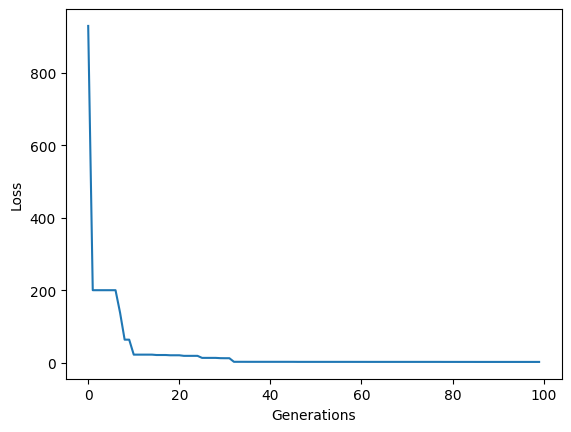

In [35]:
# Giá trị loss tốt nhất ứng với từng generation
visualize_loss(losses_list)

# Bài tập 11 (Trực quan hoá kết quả dự đoán sales và giá trị thực tế )
Hoàn thiện function visualize_predict_gt để hiển thị kết quả dự đoán sales với giá trị thực tế từ ground truth (hình 3)

In [32]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
     #estimated_price = np.dot(feature, theta)
     estimated_prices.append(np.dot(feature, theta))

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

[-1.47679883 -0.48419361  3.33509821  0.123994  ]


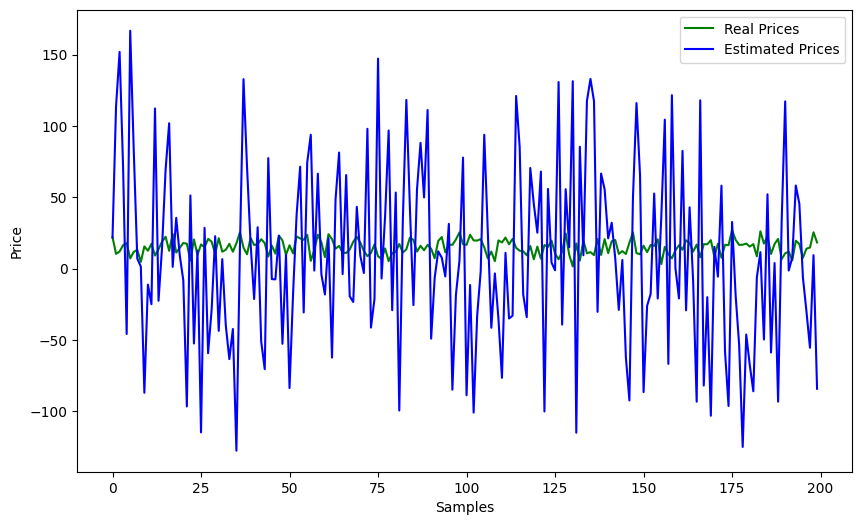

In [34]:
# kết quả dự đoán sales và giá trị thực tế
visualize_predict_gt()